## Dimensionality Reduction in Python

### CHAPTER 1. Exploring High Dimensional Data

#### 1.1 Introduction

* Dimension of data -> number of columns in dataset
* Observations -> number of rows in dataset

In [43]:
# finding number of dimensions
import pandas as pd

pokemon_df = pd.read_csv('7_datasets/pokemon.csv')
print(pokemon_df.shape)
# print(pokemon_df.head())
# dimensions / number of columns is 13

(800, 13)


In [44]:
# removing featurese without variance
# find feature with .describe() method
print(pokemon_df.describe())

# find subset of dataset
number_cols = ['HP', 'Attack', 'Defense']
non_number_cols = ['Name', 'Type 1']
df_selected = pokemon_df[number_cols + non_number_cols]

# print info
print(df_selected.head())
print(df_selected.describe(exclude='number'))

                #      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000  
25%     50.000000   45.000000     2.00000  
50%     70.0000

#### 1.2 Feature selection vs. feature extraction

Why reduce dimensionality?

Your dataset will:
* Be less complex
* Require less disk space
* Require less computation time
* Have lower chance of model over-fitting

Feature selection:
* Select features ONLY select subset of features you think is important, and drop the other ones

Feature extraction:
* Calculate or extract new features from the original ones, these new features have as little redundant information as possible

In [45]:
# visually detecting redundant features
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# get datasets
ansur_df_male = pd.read_csv('7_datasets/ANSUR_male.csv')
ansur_df_female = pd.read_csv('7_datasets/ANSUR_female.csv')
ansur_df = pd.concat([ansur_df_male, ansur_df_female])
ansur_df = ansur_df.reset_index()
print(ansur_df.shape)
print(ansur_df.info())

(6068, 100)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 100 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           6068 non-null   int64  
 1   Branch                          6068 non-null   object 
 2   Component                       6068 non-null   object 
 3   Gender                          6068 non-null   object 
 4   abdominalextensiondepthsitting  6068 non-null   int64  
 5   acromialheight                  6068 non-null   int64  
 6   acromionradialelength           6068 non-null   int64  
 7   anklecircumference              6068 non-null   int64  
 8   axillaheight                    6068 non-null   int64  
 9   balloffootcircumference         6068 non-null   int64  
 10  balloffootlength                6068 non-null   int64  
 11  biacromialbreadth               6068 non-null   int64  
 12  bicepscircumferencefl

In [46]:
ansur_df.head()

,index,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,...,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,...,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall


In [47]:
# create new columns
ansur_df['body_height'] = ansur_df['stature_m'] * 39.37
ansur_df['n_legs'] = 2

# get two subset datasets
cols_1 = ['Gender', 'weight_kg', 'stature_m', 'body_height']
cols_2 = ['Gender', 'footlength', 'headlength', 'n_legs']
ansur_df_1 = ansur_df[cols_1]
ansur_df_2 = ansur_df[cols_2]


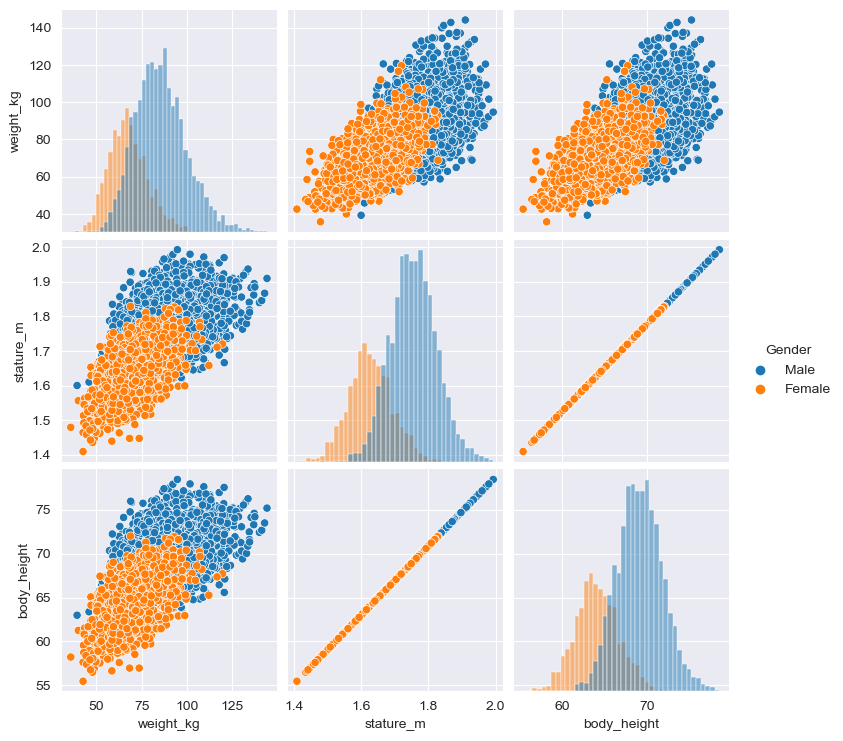

In [48]:
# create pairplot for 'ansur_df_1' to detect redundant features
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')
plt.show()

# two features 'body_height' and 'stature_m' are duplicates, remove one of them.

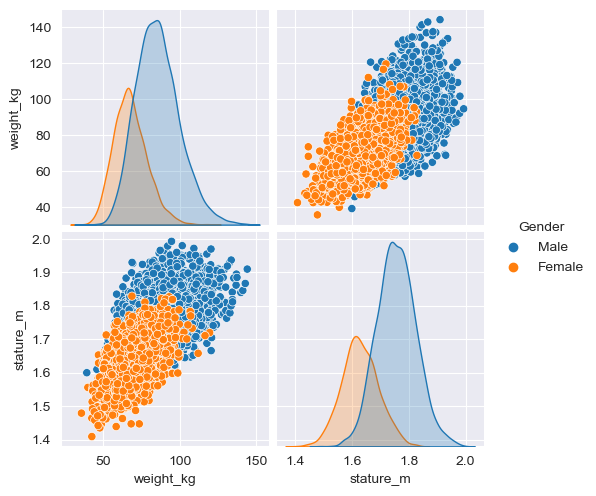

In [49]:
# create pairplot for new dataset after removing column
reduced_df = ansur_df_1.drop('body_height', axis=1)
sns.pairplot(reduced_df, hue='Gender')
plt.show()

# now it looks great!

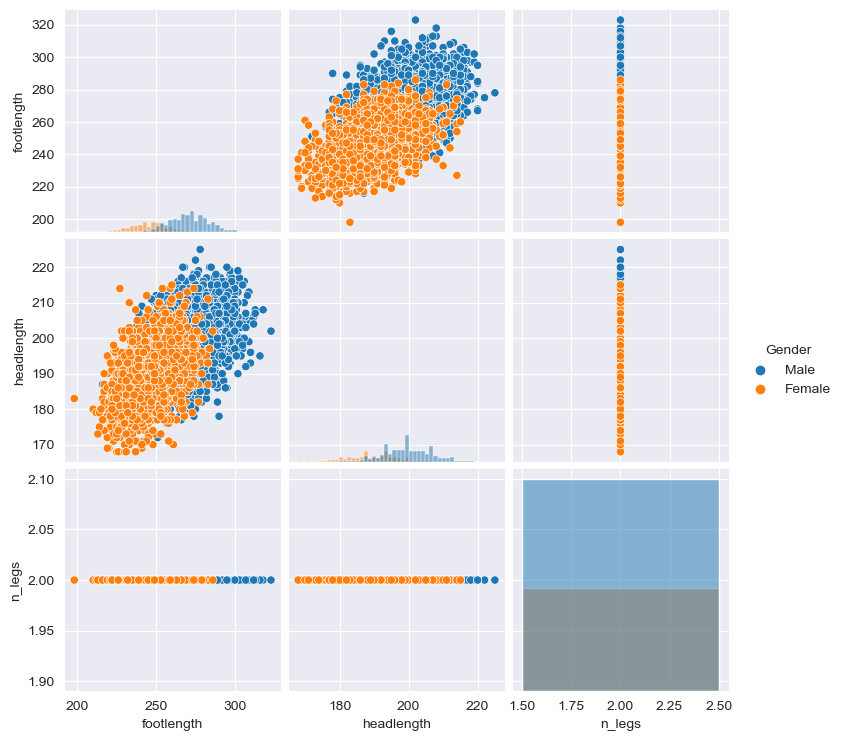

In [50]:
# create pairplot for 'ansur_df_2' to detect redundant features
sns.pairplot(ansur_df_2, hue='Gender', diag_kind='hist')
plt.show()

# variable 'n_legs' has no variance, remove it

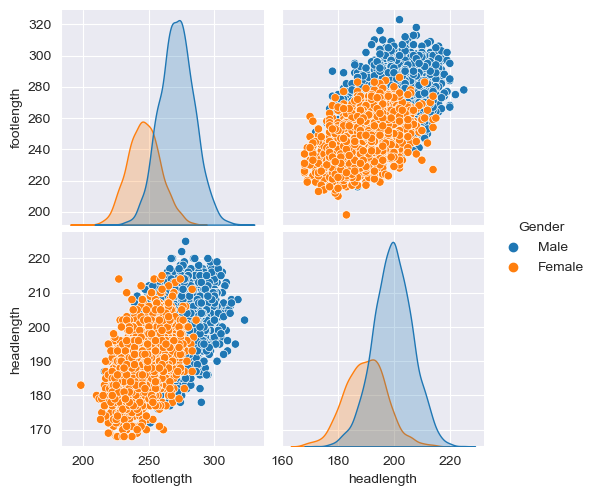

In [51]:
# create pairplot for new dataset after removing column
reduced_df = ansur_df_2.drop('n_legs', axis=1)
sns.pairplot(reduced_df, hue='Gender')
plt.show()

# now it looks great!

#### 1.3 t-SNE visualization of high-dimensional data

* t-SNE full name is **t-Distributed Stochastic Neighbor Embedding**
* It is a powerful technique to visualize high dimensional data using feature extraction

In [52]:
# fitting t-SNE to ANSUR data
import pandas as pd
from sklearn.manifold import TSNE

# get dataset
ansur_df_male = pd.read_csv('7_datasets/ANSUR_male.csv')
ansur_df_female = pd.read_csv('7_datasets/ANSUR_female.csv')
ansur_df = pd.concat([ansur_df_male, ansur_df_female])

# remove non-numerical columns
non_numeric = ['Branch', 'Gender', 'Component', 'BMI_class', 'Height_class']
df_numeric = ansur_df.drop(non_numeric, axis=1)

# create a t-SNE model
m = TSNE(learning_rate=50)
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(6068, 2)


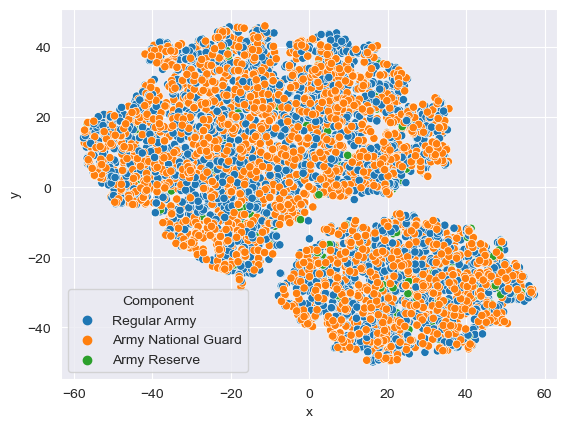

In [53]:
# t-SNE visualization of dimensionality
import seaborn as sns
import matplotlib.pyplot as plt

# add t-SNE features to dataset
ansur_df['x'] = tsne_features[:, 0]
ansur_df['y'] = tsne_features[:, 1]

# make scatterplot with 'Component' as hue
sns.scatterplot(x="x", y="y", hue='Component', data=ansur_df)
plt.show()

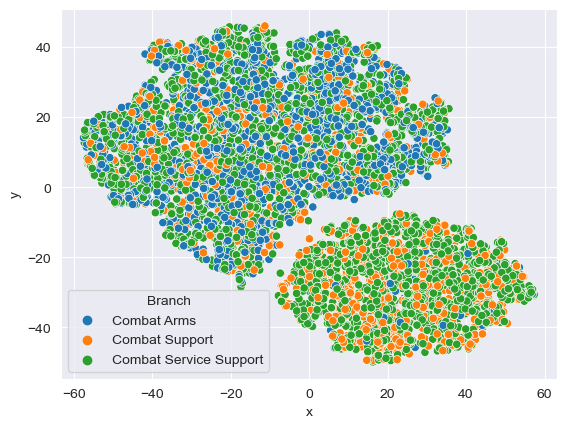

In [54]:
# make scatterplot with 'Branch' as hue
sns.scatterplot(x="x", y="y", hue='Branch', data=ansur_df)
plt.show()

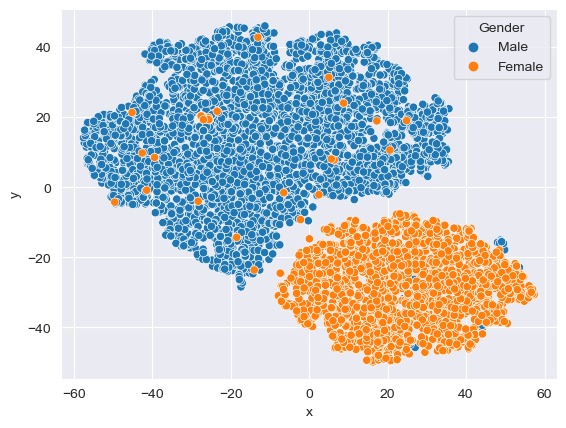

In [55]:
# make scatterplot with 'Gender' as hue
sns.scatterplot(x="x", y="y", hue='Gender', data=ansur_df)
plt.show()

**Conclusion:**

From above plots, we learn that t-SNE found two clusters for male and female. From second plot, we also learn that there are more males in the Combat Arms Branch.

### CHAPTER 2. Feature Selection I - Selecting for Feature Information

#### 2.1 The curse of dimensionality

*

#### 2.2 Features with missing values or little variance

#### 2.3 Pairwise correlation

#### 2.4 Removing highly correlated features

### CHAPTER 3. Feature Selection II - Selecting for Model Accuracy

#### 3.1 Selecting features for model performance

#### 3.2 Tree-based feature selection

#### 3.3 Regularized linear regression

#### 3.4 Combining feature selectors

### CHAPTER 4. Feature Extraction

#### 4.1 Feature extraction

#### 4.2 Principal component analysis (PCA)

#### 4.3 PCA applications

#### 4.4 Principal Component selection

This is the end of this course!